# Deeper analysis of the data
The data is split into 10 classes, search for important attributes for each class.
or each **`train_smpl_<label>`** file, record the first 10 pixels, in order of the absolute
correlation value, for each street sign.

In [3]:
from Scripts.NaiveBayse import SamNaiveBayseGaussian as nbg
from Scripts import helperfn as hf

model = nbg.build_nbg_models()

ImportError: cannot import name 'SamNaiveBayseGaussian' from 'Scripts.NaiveBayse' (c:\Users\lewis\Desktop\Data Mining & Machine Learning\Coursework 1\Data-Mining-Machine-Learning-CW\Tasks\Scripts\NaiveBayse\__init__.py)

In [2]:


X, y = hf.get_data(8)


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# X['333'].corr(y['y'])

onlyOne = X['0'].astype(int).to_frame()

appended = hf.append_result_col(onlyOne, y)
corrMatrix = appended.corr(method='spearman')


result = []

for i in range(X.shape[1]):
    result.append(X[str(i)].corr(y['y']))

result = np.array(result)

In [4]:
#make 3 datasets

#one for each corroloation method

#each datsaet will contain the dataset of the column and y label

res_arr = []

for i in range(100):

    index = np.argmax(result)
    res_arr.append(index)

    result = np.delete(result, index)

print(res_arr)

[747, 794, 794, 1212, 1259, 1035, 1083, 1130, 1161, 746, 746, 1159, 1205, 698, 1112, 1079, 698, 1294, 1293, 1246, 1246, 983, 1063, 1107, 738, 1029, 1195, 836, 1330, 1163, 782, 1059, 1299, 649, 1393, 649, 695, 784, 778, 1009, 1155, 1339, 783, 1337, 1108, 735, 1050, 1136, 734, 1105, 648, 1238, 690, 600, 823, 1001, 1187, 688, 1086, 599, 1257, 690, 964, 599, 644, 730, 817, 729, 1267, 1222, 1206, 643, 1176, 1288, 1401, 910, 765, 642, 1285, 598, 942, 1240, 907, 641, 1324, 1069, 1322, 681, 682, 993, 938, 759, 980, 855, 1320, 1319, 800, 1159, 1194, 1102]


In [5]:
from Scripts import pixelFinder as pf 
%load_ext autoreload
%autoreload 2

best = pf.bestPixels(0, 2304)

# print(best)

In [6]:
temp = np.array(best)
np.unique(temp).shape

(2304,)

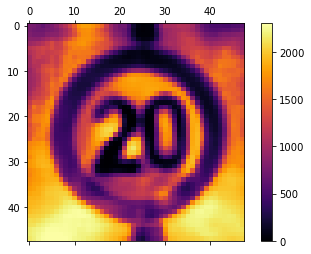

In [7]:
import matplotlib.pyplot as plt

sort = np.empty(2304, dtype=int)

for i in range(2304):
    index = best[i]
    sort[index] = i


sort2d = np.reshape(sort, (-1, 48))

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(sort2d, interpolation='nearest', cmap='inferno')
fig.colorbar(cax)


plt.show()

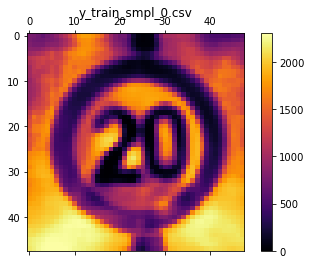

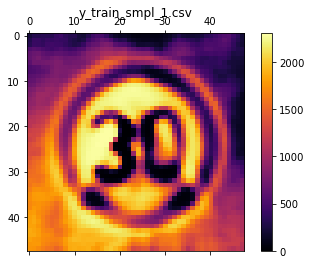

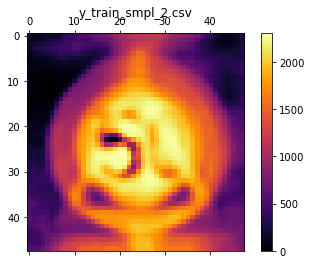

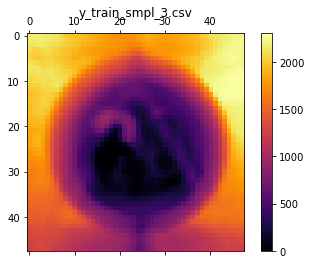

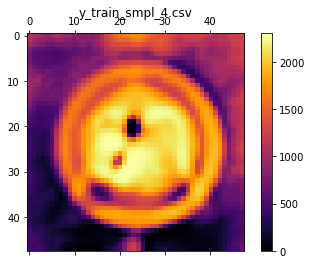

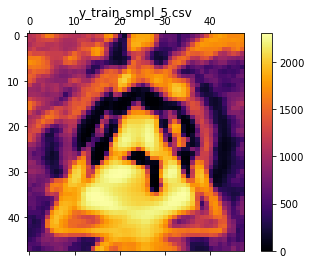

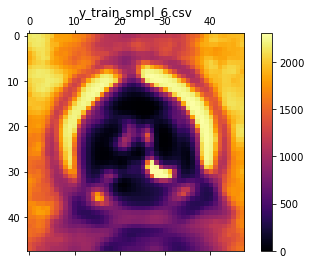

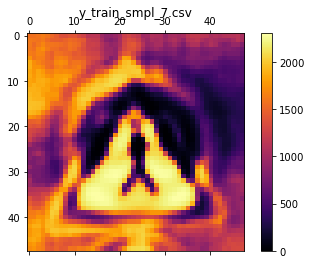

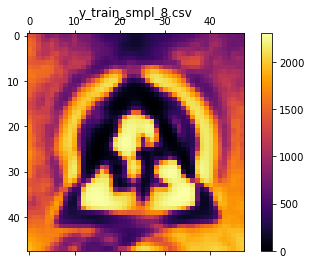

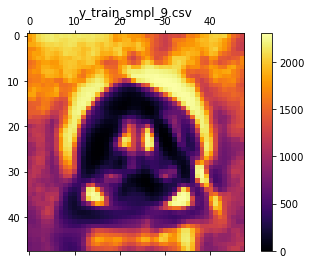

In [8]:
pf.showHeatmap()

In [2]:
# Find top 5 pixels of data result 0
best = pf.bestPixels(0, 5)

NameError: name 'pf' is not defined

In [10]:
best

[1362, 982, 1030, 1315, 1314]